### Test, Train and Cross Validation Split
- we will have train : 70% data as we will get k fold cross validation too
- test : 20%
- cv : 10%

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [3]:
result = pd.read_csv("./data/cancer-treatment/result.csv")

In [4]:
y_true = result['Class'].values
# replace space in Gene to undersccore
result.Gene = result.Gene.str.replace('\s+','_')
result.Variation = result.Variation.str.replace('\s+','_')
from sklearn.model_selection import train_test_split

In [5]:
# splitting data into test and train by 
    # maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)


In [6]:
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1)

In [7]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2390
Number of data points in test data: 665
Number of data points in cross validation data: 266


** Distribution of yi's in Train, Test and Cross Validation datasets **

In [9]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_dist = train_df['Class'].value_counts().sortlevel()
test_class_distribution = test_df['Class'].value_counts().sortlevel()
cv_class_distribution = cv_df['Class'].value_counts().sortlevel()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  after removing the cwd from sys.path.


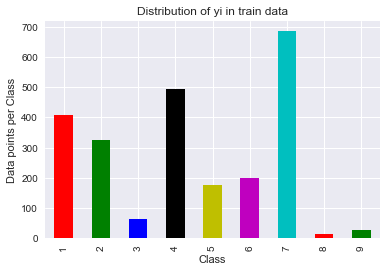

In [10]:
my_colors = 'rgbkymc'
train_class_dist.plot(kind='bar', color=my_colors);
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.show()

Number of data points in class 7 : 686 ( 28.703 %)
Number of data points in class 4 : 494 ( 20.669 %)
Number of data points in class 1 : 408 ( 17.071 %)
Number of data points in class 2 : 325 ( 13.598 %)
Number of data points in class 6 : 198 ( 8.285 %)
Number of data points in class 5 : 175 ( 7.322 %)
Number of data points in class 3 : 64 ( 2.678 %)
Number of data points in class 9 : 27 ( 1.13 %)
Number of data points in class 8 : 13 ( 0.544 %)


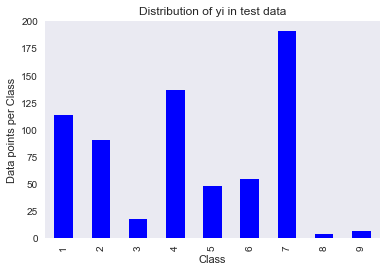

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


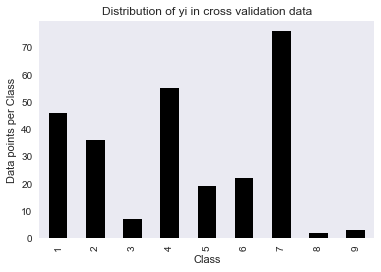

Number of data points in class 7 : 76 ( 28.571 %)
Number of data points in class 4 : 55 ( 20.677 %)
Number of data points in class 1 : 46 ( 17.293 %)
Number of data points in class 2 : 36 ( 13.534 %)
Number of data points in class 6 : 22 ( 8.271 %)
Number of data points in class 5 : 19 ( 7.143 %)
Number of data points in class 3 : 7 ( 2.632 %)
Number of data points in class 9 : 3 ( 1.128 %)
Number of data points in class 8 : 2 ( 0.752 %)


In [13]:
sorted_yi = np.argsort(-train_class_dist.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_dist.values[i], '(', np.round((train_class_dist.values[i]/train_df.shape[0]*100), 3), '%)')

    
test_class_distribution.plot(kind='bar', color='b')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()    

sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar', color='k')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_dist.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


Observations: 
- We can see in all the distributions
    - class 3,5,8,7 are the minority class
    - they have the least data 

### Encoding of the data
- We are going to use 
    - onehotencoding ie. Bag of words model
    - Tfidf
    - Tfidf Word2Vec(google's model)
    
** 1. OnehotEncoding **

In [18]:
from sklearn.feature_extraction.text import CountVectorizer


In [19]:
# GENE feature
gene_vectorizer = CountVectorizer(ngram_range=(1,2))
train_gene_onehot = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_onehot = gene_vectorizer.transform(test_df['Gene'])
cv_gene_onehot = gene_vectorizer.transform(cv_df['Gene'])

In [21]:
# original data shape
print("train df shape: ",train_df.shape)
print("test df shape: ",test_df.shape)
print("cv df shape: ",cv_df.shape)
print("--------------------------------")
# After response coding
print("train onehot encoded shape:",train_gene_onehot.shape)
print("test onehot encoded shape:",test_gene_onehot.shape)
print("cv onehot encoded shape:",cv_gene_onehot.shape)

train df shape:  (2390, 6)
test df shape:  (665, 6)
cv df shape:  (266, 6)
--------------------------------
train onehot encoded shape: (2390, 241)
test onehot encoded shape: (665, 241)
cv onehot encoded shape: (266, 241)


In [25]:
# Variation
variation_vectorizer = CountVectorizer(ngram_range=(1,2))
train_var_onehot = variation_vectorizer.fit_transform(train_df['Variation'])
test_var_onehot = variation_vectorizer.transform(test_df['Variation'])
cv_var_onehot = variation_vectorizer.transform(cv_df['Variation'])

In [29]:
# Text
text_vectorizer = CountVectorizer(min_df=3,ngram_range=(1,2))
train_text_onehot = text_vectorizer.fit_transform(train_df['TEXT'])
train_text_onehot = normalize(train_text_onehot, axis=0)

test_text_onehot = text_vectorizer.transform(test_df['TEXT'])
test_text_onehot = normalize(test_text_onehot, axis=0)

cv_text_onehot = text_vectorizer.transform(cv_df['TEXT'])
cv_text_onehot = normalize(cv_text_onehot, axis=0)

In [33]:
# Stacking the three features using hstack
# we will use scipy.sparse.hstack for onehot as it is sparse 
from scipy.sparse import hstack

train_onehot = hstack((train_gene_onehot,train_var_onehot))
train_onehot = hstack((train_onehot,train_text_onehot))

test_onehot = hstack((test_gene_onehot,test_var_onehot))
test_onehot = hstack((test_onehot,test_text_onehot))

cv_onehot = hstack((cv_gene_onehot,cv_var_onehot))
cv_onehot = hstack((cv_onehot, cv_text_onehot))

print("One hot encoding features :")
print("train data = ", train_onehot.shape)
print("test data = ", test_onehot.shape)
print("cross validation data =", cv_onehot.shape)

One hot encoding features :
train data =  (2390, 847072)
test data =  (665, 847072)
cross validation data = (266, 847072)


** 2. TF-IDF **

In [43]:
# Gene
tfidf_gene_vect = TfidfVectorizer(ngram_range=(1,2))
train_gene_tfidf = tfidf_gene_vect.fit_transform(train_df['Variation'])
test_gene_tfidf = tfidf_gene_vect.transform(test_df['Variation'])
cv_gene_tfidf = tfidf_gene_vect.transform(cv_df['Variation'])

In [35]:
# Variation
tfidf_var_vect = TfidfVectorizer(ngram_range=(1,2))
train_var_tfidf = tfidf_var_vect.fit_transform(train_df['Variation'])
test_var_tfidf = tfidf_var_vect.transform(test_df['Variation'])
cv_var_tfidf = tfidf_var_vect.transform(cv_df['Variation'])

In [53]:
# Text
tfidf_text_vect = TfidfVectorizer(min_df=3,ngram_range=(1,2))
train_text_tfidf = tfidf_text_vect.fit_transform(train_df['TEXT'])
train_text_tfidf = normalize(test_text_tfidf, axis=0)

test_text_tfidf = tfidf_text_vect.transform(test_df['TEXT'])
test_text_tfidf = normalize(test_text_tfidf, axis=0)

cv_text_tfidf = tfidf_text_vect.transform(cv_df['TEXT'])
cv_text_tfidf = normalize(cv_text_tfidf, axis=0)

In [39]:
# Stacking the three features using hstack
# we will use scipy.sparse.hstack for onehot as it is sparse 
from scipy.sparse import hstack

train_tfidf = hstack((train_gene_tfidf,train_var_tfidf))
train_tfidf = hstack((train_tfidf,train_text_tfidf))

test_tfidf = hstack((test_gene_tfidf,test_var_tfidf))
test_tfidf = hstack((test_tfidf,test_text_tfidf))

cv_tfidf = hstack((cv_gene_tfidf,cv_var_tfidf))
cv_tfidf = hstack((cv_tfidf, cv_text_tfidf))

print("One hot encoding features :")
print("train data = ", train_tfidf.shape)
print("test data = ", test_tfidf.shape)
print("cross validation data =", cv_tfidf.shape)

One hot encoding features :
train data =  (2390, 849142)
test data =  (665, 849142)
cross validation data = (266, 849142)


** 3. Word2Vec **
- we will use googles word2vec model

In [41]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

C:\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [42]:
model = KeyedVectors.load_word2vec_format("./data/Google-W2V/GoogleNews-vectors-negative300.bin",binary=True)

In [45]:
def get_tfidf_vect(data,tfidf_column,tfidf_vect):
    tfidf_features = tfidf_vect.get_feature_names()  
    tfidf_sent_vectors = [] 
    row =0
    for sent in data: 
        sent_vec = np.zeros(300)
        weight_sum =0 
        for word in sent.split(" "): 
            try:
                vec = model.wv[word]
                # obtain the tf_idf of a word
                tfidf = tfidf_column[row, tfidf_features.index(word)]
                sent_vec += (vec*tfidf)
                weight_sum += tfidf
            except:
                pass
        sent_vec /= weight_sum
        tfidf_sent_vectors.append(sent_vec)
        row+=1
    return tfidf_sent_vectors

In [62]:
# for Gene
train_gene_w2v = get_tfidf_vect(train_df['Gene'],train_gene_tfidf,tfidf_gene_vect)
test_gene_w2v = get_tfidf_vect(test_df['Gene'],test_gene_tfidf,tfidf_gene_vect)
cv_gene_w2v = get_tfidf_vect(cv_df['Gene'],cv_gene_tfidf,tfidf_gene_vect)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [64]:
# getting to know the shapes
np.array(train_gene_w2v).shape
# so google's model gives us a 300-D data

(2390, 300)

In [65]:
# For Variation
train_var_w2v = get_tfidf_vect(train_df['Variation'],train_var_tfidf,tfidf_var_vect)
test_var_w2v = get_tfidf_vect(test_df['Variation'],test_var_tfidf,tfidf_var_vect)
cv_var_w2v = get_tfidf_vect(cv_df['Variation'],cv_var_tfidf,tfidf_var_vect)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
# For Text
train_text_w2v = get_tfidf_vect(train_df['TEXT'],train_text_tfidf,tfidf_text_vect)
test_text_w2v = get_tfidf_vect(test_df['TEXT'],test_text_tfidf,tfidf_text_vect)
cv_text_w2v = get_tfidf_vect(cv_df['TEXT'],cv_text_tfidf,tfidf_text_vect)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Stacking the three together
# now this is not sparse .'. we will use np.hstack 
from numpy import hstack
model.

## Univariate Analysis

- To check how good a feature is for predicting y_i we will build models with the features and compare with the random model

** Random Model **

In [ ]:
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exaclty same size as CV data
cv_predicted_y = np.zeros((cv_data_len,9))